In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from optimizers.sgd import SGD
from optimizers.momentum import Momentum
from optimizers.adagrad import Adagrad
from optimizers.adadelta import Adadelta
from optimizers.rmsprop import RMSProp
from optimizers.nesterov import Nesterov

from schedulers.vanilla import VanillaScheduler

In [3]:
ITERATIONS = 100
init_x, init_y = 10, 10
scheduler = VanillaScheduler(0.1)
X_OPT = 1
Y_OPT = -1
EPSILON = 0.00000001
GAMMA = 0.9

In [4]:
def f(x: float, y: float) -> float:
    return (x-X_OPT)**2 + (y-Y_OPT)**2 / 5 + 1


def g(x, y):
    return (1-x)**2 + 100 * (y - x**2)**2

In [5]:
sgd = SGD(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, scheduler=scheduler)
sgd.simulate()

In [6]:
momentum = Momentum(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, scheduler=scheduler, gamma=GAMMA)
momentum.simulate()

In [7]:
nesterov = Nesterov(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, scheduler=scheduler, gamma=GAMMA)
nesterov.simulate()

In [8]:
adagrad = Adagrad(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, scheduler=scheduler, epsilon=EPSILON)
adagrad.simulate()

In [9]:
adadelta = Adadelta(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, gamma=0.9,  epsilon=EPSILON)
adadelta.simulate()

In [10]:
rmsprop = RMSProp(iterations=ITERATIONS, init_x=init_x, init_y=init_y, func=f, gamma=0.9, scheduler=scheduler, epsilon=EPSILON)
rmsprop.simulate()

<IPython.core.display.Javascript object>


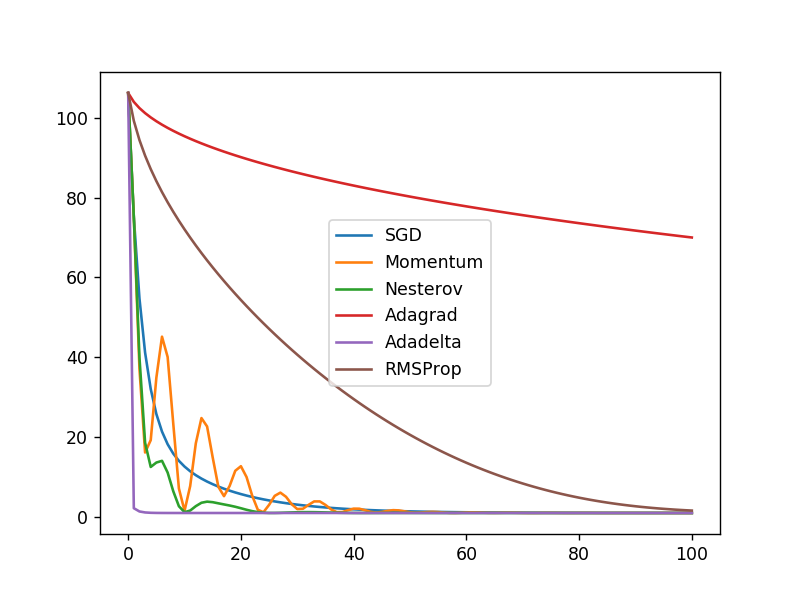

In [11]:
plt.plot(sgd.f_values, label='SGD')
plt.plot(momentum.f_values, label='Momentum')
plt.plot(nesterov.f_values, label='Nesterov')
plt.plot(adagrad.f_values, label='Adagrad')
plt.plot(adadelta.f_values, label='Adadelta')
plt.plot(rmsprop.f_values, label='RMSProp')
plt.legend()

<IPython.core.display.Javascript object>


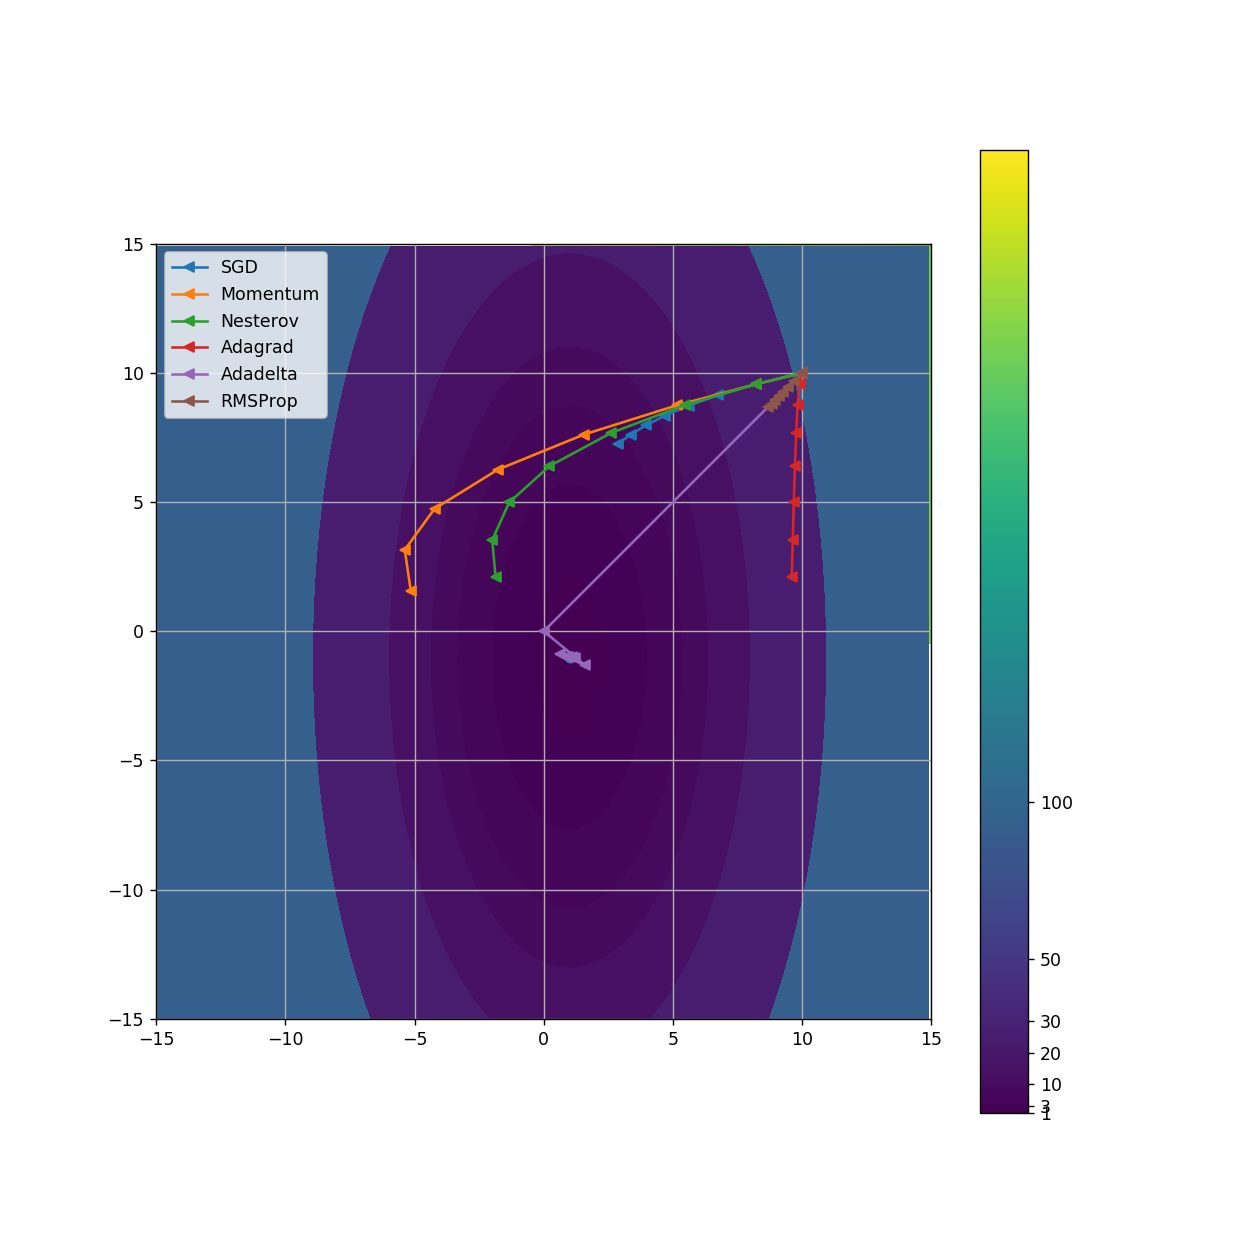

In [12]:
X_MIN, X_MAX, Y_MIN, Y_MAX = -15, 15, -15, 15
STEP = 0.1
X, Y = np.meshgrid(np.arange(X_MIN, X_MAX, STEP), np.arange(Y_MIN, Y_MAX, STEP))

Z = f(X, Y)
levels = [0, 1, 3, 10, 20, 30, 50, 100, 500, 1000]
x_sgd_anim, y_sgd_anim = [],[]
x_momentum_anim, y_momentum_anim = [], []
x_nesterov_anim, y_nesterov_anim = [], []
x_adagrad_anim, y_adagrad_anim  = [], []
x_adadelta_anim, y_adadelta_anim = [], []
x_rmsprop_anim, y_rmsprop_anim = [], []

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

line_sgd, = ax.plot(0, 0, marker='<', label='SGD')
line_mom, = ax.plot(0, 0, marker='<', label='Momentum')
line_nesterov, = ax.plot(0, 0, marker='<', label='Nesterov')
line_adagrad, = ax.plot(0, 0, marker='<', label='Adagrad')
line_adadelta, = ax.plot(0, 0, marker='<', label='Adadelta')
line_rmsprop, = ax.plot(0, 0, marker='<', label='RMSProp')
plt.legend()
ax.contourf(X, Y, Z, levels=levels)


def animation_frame(step):
    x_sgd_anim.append(step[0])
    y_sgd_anim.append(step[1])
    x_momentum_anim.append(step[2])
    y_momentum_anim.append(step[3])
    x_nesterov_anim.append(step[4])
    y_nesterov_anim.append(step[5])
    x_adagrad_anim.append(step[6])
    y_adagrad_anim.append(step[7])
    x_adadelta_anim.append(step[8])
    y_adadelta_anim.append(step[9])
    x_rmsprop_anim.append(step[10])
    y_rmsprop_anim.append(step[11])

    line_sgd.set_xdata(x_sgd_anim)
    line_sgd.set_ydata(y_sgd_anim)
    line_mom.set_xdata(x_momentum_anim)
    line_mom.set_ydata(y_momentum_anim)
    line_nesterov.set_xdata(x_nesterov_anim)
    line_nesterov.set_ydata(y_nesterov_anim)
    line_adagrad.set_xdata(x_adagrad_anim)
    line_adagrad.set_ydata(y_nesterov_anim)
    line_adadelta.set_xdata(x_adadelta_anim)
    line_adadelta.set_ydata(y_adadelta_anim)
    line_rmsprop.set_xdata(x_rmsprop_anim)
    line_rmsprop.set_ydata(y_rmsprop_anim)
    return line_sgd, line_mom, line_nesterov, line_adagrad, line_adadelta, line_rmsprop,


frames = np.array(
        [[x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6] for x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6 in
         zip(sgd.x_values, sgd.y_values,
             momentum.x_values, momentum.y_values,
             nesterov.x_values, nesterov.y_values,
             adagrad.x_values, adagrad.y_values,
             adadelta.x_values, adadelta.y_values,
             rmsprop.x_values, rmsprop.y_values)])
animation = FuncAnimation(fig, func=animation_frame, frames=frames, interval=1000)
ax.scatter([X_OPT], [Y_OPT])
plt.imshow(Z)
plt.colorbar(ticks=levels)
plt.grid()
plt.show()